<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pickle

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [222]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [4]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [5]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [6]:
df_test.describe(include='object')

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


**Отобразите 10 случайных строк тренировочного датасета (0.15 балла)**

In [9]:
df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

**Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)**

In [10]:
df_test.head(5)

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [11]:
df_test.tail(5)

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

**Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)**


In [13]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [14]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

**Пропуски**

*df_train*

* mileage
* engine
* max_power
* torque
* seats

*df_test*
* mileage
* engine
* max_power
* torque
* seats



Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [223]:
df_train['mileage'] = df_train['mileage'].fillna(df_train['mileage'].mode()[0])
df_train['engine'] = df_train['engine'].fillna(df_train['engine'].mode()[0])
df_train['max_power'] = df_train['max_power'].fillna(df_train['max_power'].mode()[0])
df_train['torque'] = df_train['torque'].fillna(df_train['torque'].mode()[0])
df_train['seats'] = df_train['seats'].fillna(df_train['seats'].median())

In [13]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [224]:
df_test['mileage'] = df_test['mileage'].fillna(df_train['mileage'].mode()[0])
df_test['engine'] = df_test['engine'].fillna(df_train['engine'].mode()[0])
df_test['max_power'] = df_test['max_power'].fillna(df_train['max_power'].mode()[0])
df_test['torque'] = df_test['torque'].fillna(df_train['torque'].mode()[0])
df_test['seats'] = df_test['seats'].fillna(df_train['seats'].median())

In [15]:
df_test.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

**Посмотрите, есть ли в данных явные дубликаты (0.05 балла)**

In [16]:
df_train.duplicated().sum()

985

In [17]:
df_test.duplicated().sum()

62

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [18]:
# your code here
df_train.drop('selling_price', axis=1).duplicated().sum()

1159

In [19]:
df_train[df_train.drop('selling_price', axis=1).duplicated()]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

In [225]:
df_train = df_train.drop_duplicates(subset = df_train.columns.difference(['selling_price']), keep='first')

In [226]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [227]:
df_train = df_train.drop('torque', axis=1)

In [161]:
# your code here
df_train[['mileage', 'engine', 'max_power']].head(10)

mileage   engine   max_power
0   23.4 kmpl  1248 CC      74 bhp
1  21.14 kmpl  1498 CC  103.52 bhp
2   23.0 kmpl  1396 CC      90 bhp
3   16.1 kmpl  1298 CC    88.2 bhp
4  20.14 kmpl  1197 CC   81.86 bhp
5  17.3 km/kg  1061 CC    57.5 bhp
6   16.1 kmpl   796 CC      37 bhp
7  23.59 kmpl  1364 CC    67.1 bhp
8   20.0 kmpl  1399 CC    68.1 bhp
9  19.01 kmpl  1461 CC  108.45 bhp

In [228]:
df_train.loc[df_train['mileage'].str.contains('km/kg'), 'mileage'] = df_train['mileage'].apply(
    lambda row: str(round(float(row.split()[0]) * 1.4, 2)) + ' kmpl' if 'km/kg' in row else row
)

In [130]:
df_train['mileage'].head(10)

0     23.4 kmpl
1    21.14 kmpl
2     23.0 kmpl
3     16.1 kmpl
4    20.14 kmpl
5    24.22 kmpl
6     16.1 kmpl
7    23.59 kmpl
8     20.0 kmpl
9    19.01 kmpl
Name: mileage, dtype: object

In [229]:
df_train['mileage'] = df_train['mileage'].str.replace(' kmpl', '')
df_train['engine'] = df_train['engine'].str.replace(' CC', '')
df_train['max_power'] = df_train['max_power'].str.replace(' bhp', '')

In [230]:
df_train['mileage'] = df_train['mileage'].astype(float)

In [231]:
df_train['engine'] = df_train['engine'].astype(float)

In [232]:
df_train['max_power'] = df_train['max_power'].str.replace('', df_train['max_power'].mode()[0])

In [233]:
df_train['max_power'] = df_train['max_power'].astype(float)

**df_test**

In [234]:
df_test = df_test.drop('torque', axis=1)

In [235]:
df_test.loc[df_test['mileage'].str.contains('km/kg'), 'mileage'] = df_test['mileage'].apply(
    lambda row: str(round(float(row.split()[0]) * 1.4, 2)) + ' kmpl' if 'km/kg' in row else row
)

In [236]:
df_test['mileage'] = df_test['mileage'].str.replace(' kmpl', '')
df_test['engine'] = df_test['engine'].str.replace(' CC', '')
df_test['max_power'] = df_test['max_power'].str.replace(' bhp', '')

In [237]:
df_test['mileage'] = df_test['mileage'].astype(float)
df_test['engine'] = df_test['engine'].astype(float)
df_test['max_power'] = df_test['max_power'].astype(float)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [238]:
# your code here
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)

In [239]:
df_test[['engine', 'seats']] = df_test[['engine', 'seats']].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [18]:
# your code here
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.415872  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.987056   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.100000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

          max_power        seats  
count  5.840000e+03  5840.000000  
mean   1.832117e+10     5.426712  
std    3.192728e+10     0.982344  
min    7.400000e+01     2.000000  
25%    7.467487e+07     5.000000  
50%    7.487417e+07     5.000000  
75%    7.497497e+07     5.000000  
max    7.447407e+10    14.000000

In [35]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [36]:
df_test.describe()

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.329880  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.952201   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.550000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.250000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.692330     5.403000  
std      34.948341     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [37]:
df_test.describe(include='object')

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [19]:
assert df_train.shape == (5840, 12) #мы же удалмили столбец torque, поэтому теперь колонок 12

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

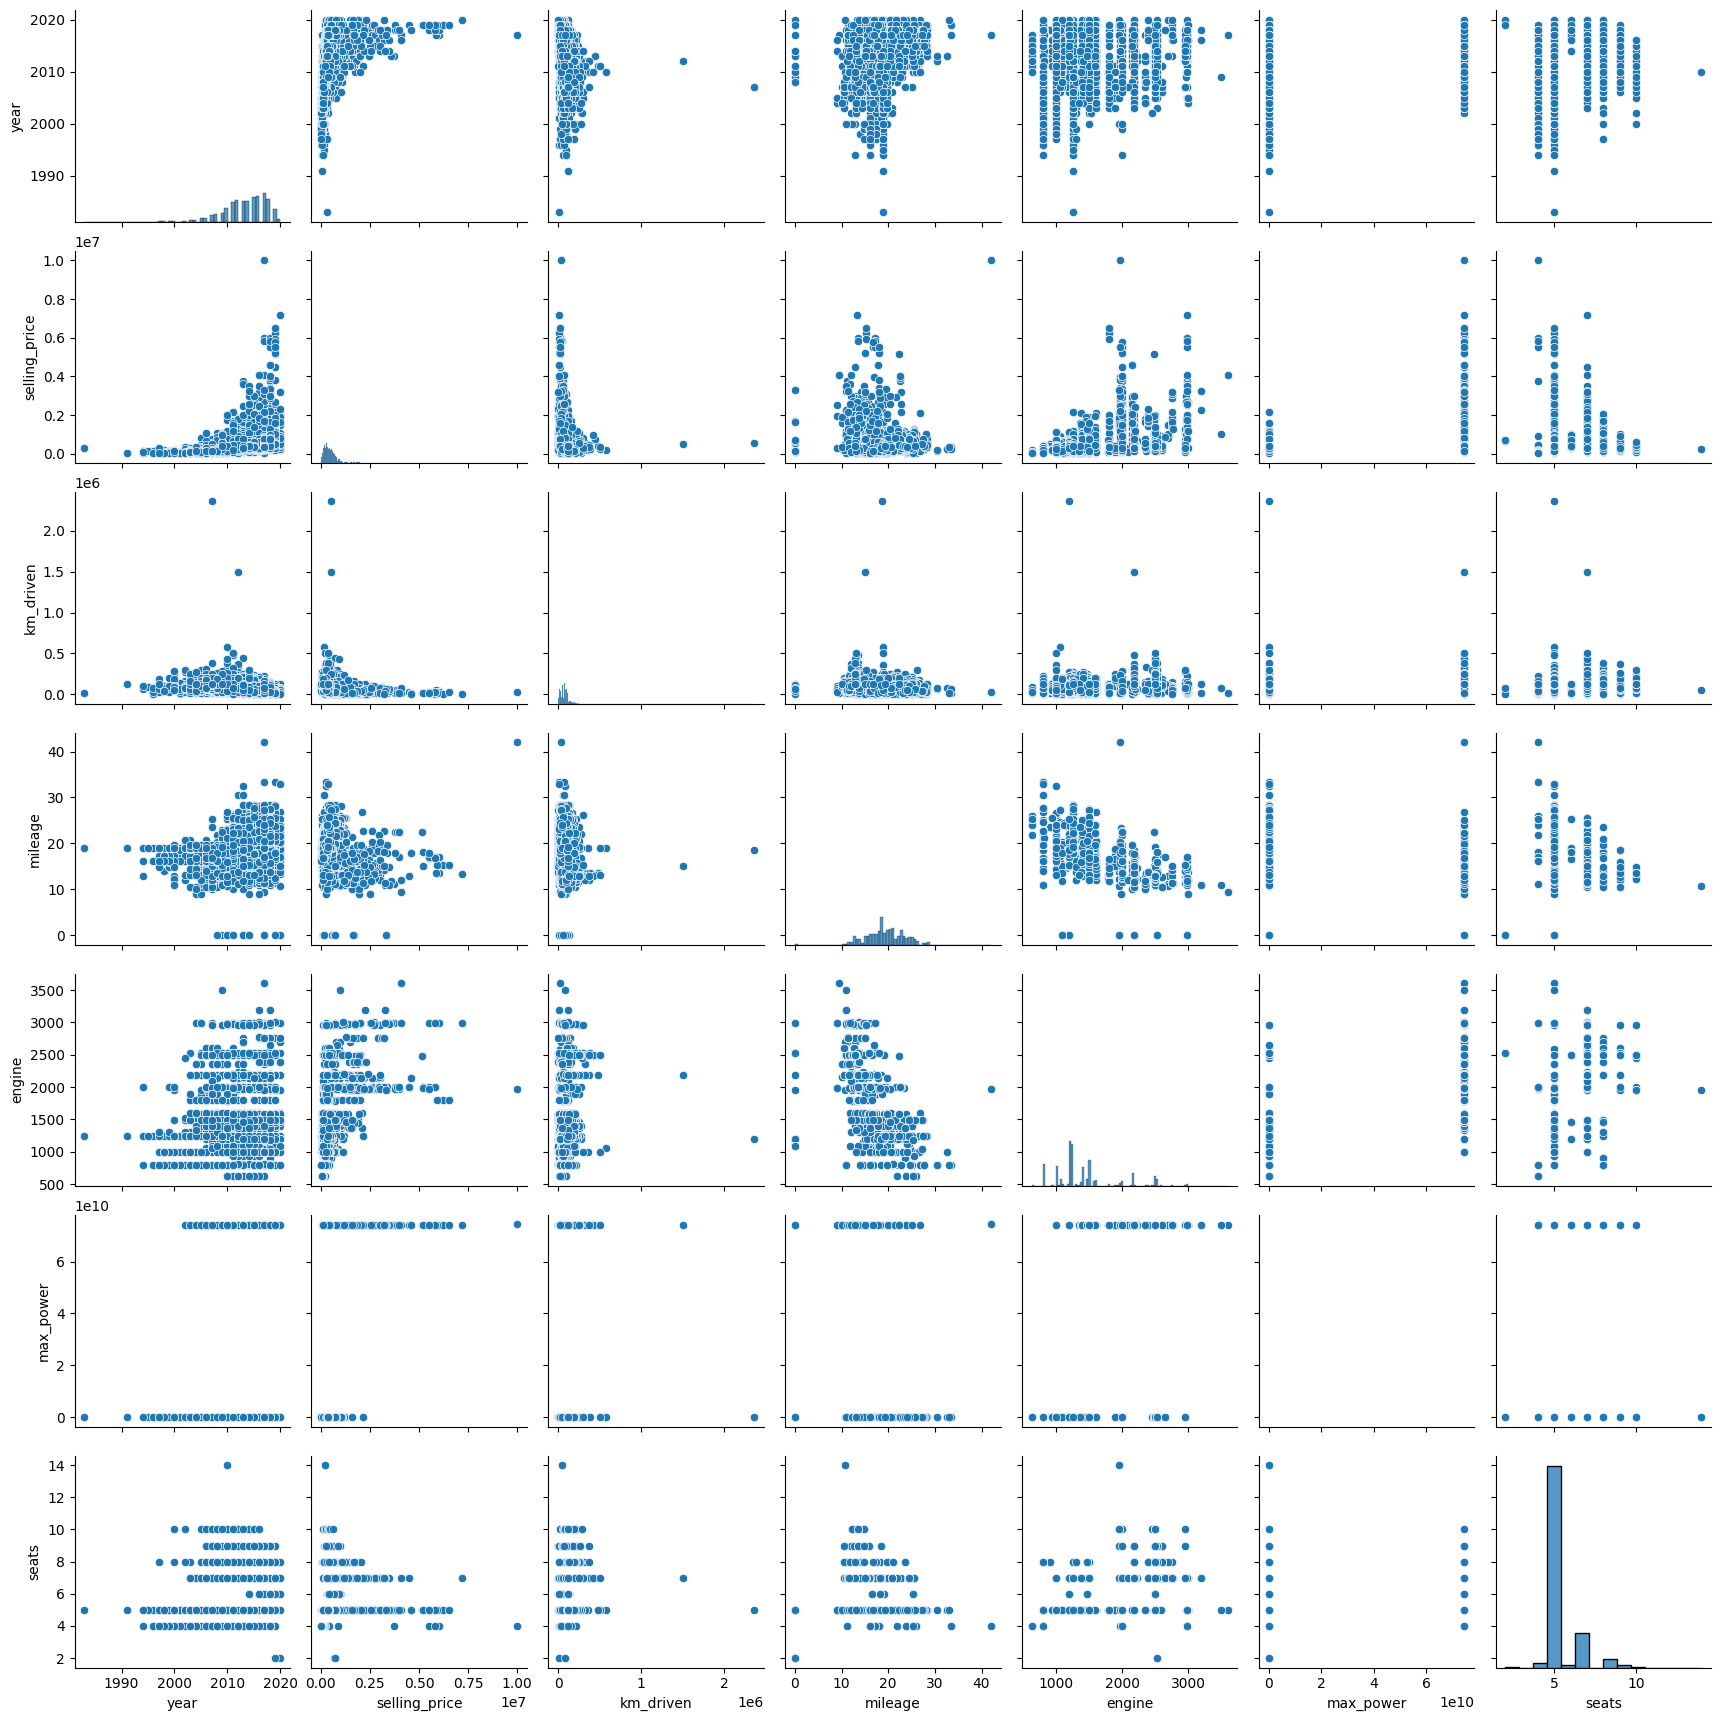

In [41]:
# your code herecorner
sns.pairplot(df_train)

**Зависимости целевой переменной от признаков**

* Зависимость от года выпуска: на распределении видно, что данные имеют экспоненциальную зависимость

* Зависимость от пробега (в км): имеет обратную экспоненциальную зависимость

* Заисимость от пробега в милях напоминает нормальной распределение,так как данные сгруппированы в центральной части графика

* Зависимость от объема двигвтеля - с увеличением объема двигателя увеличивается цена

Можно предположить о следующих корреляциях:

положительная:

* цена - год выпуска
* цена - объем двигателя

отрицательная:

* цена - пробег
* также наблюдается зависимость пробега от объема двигателя

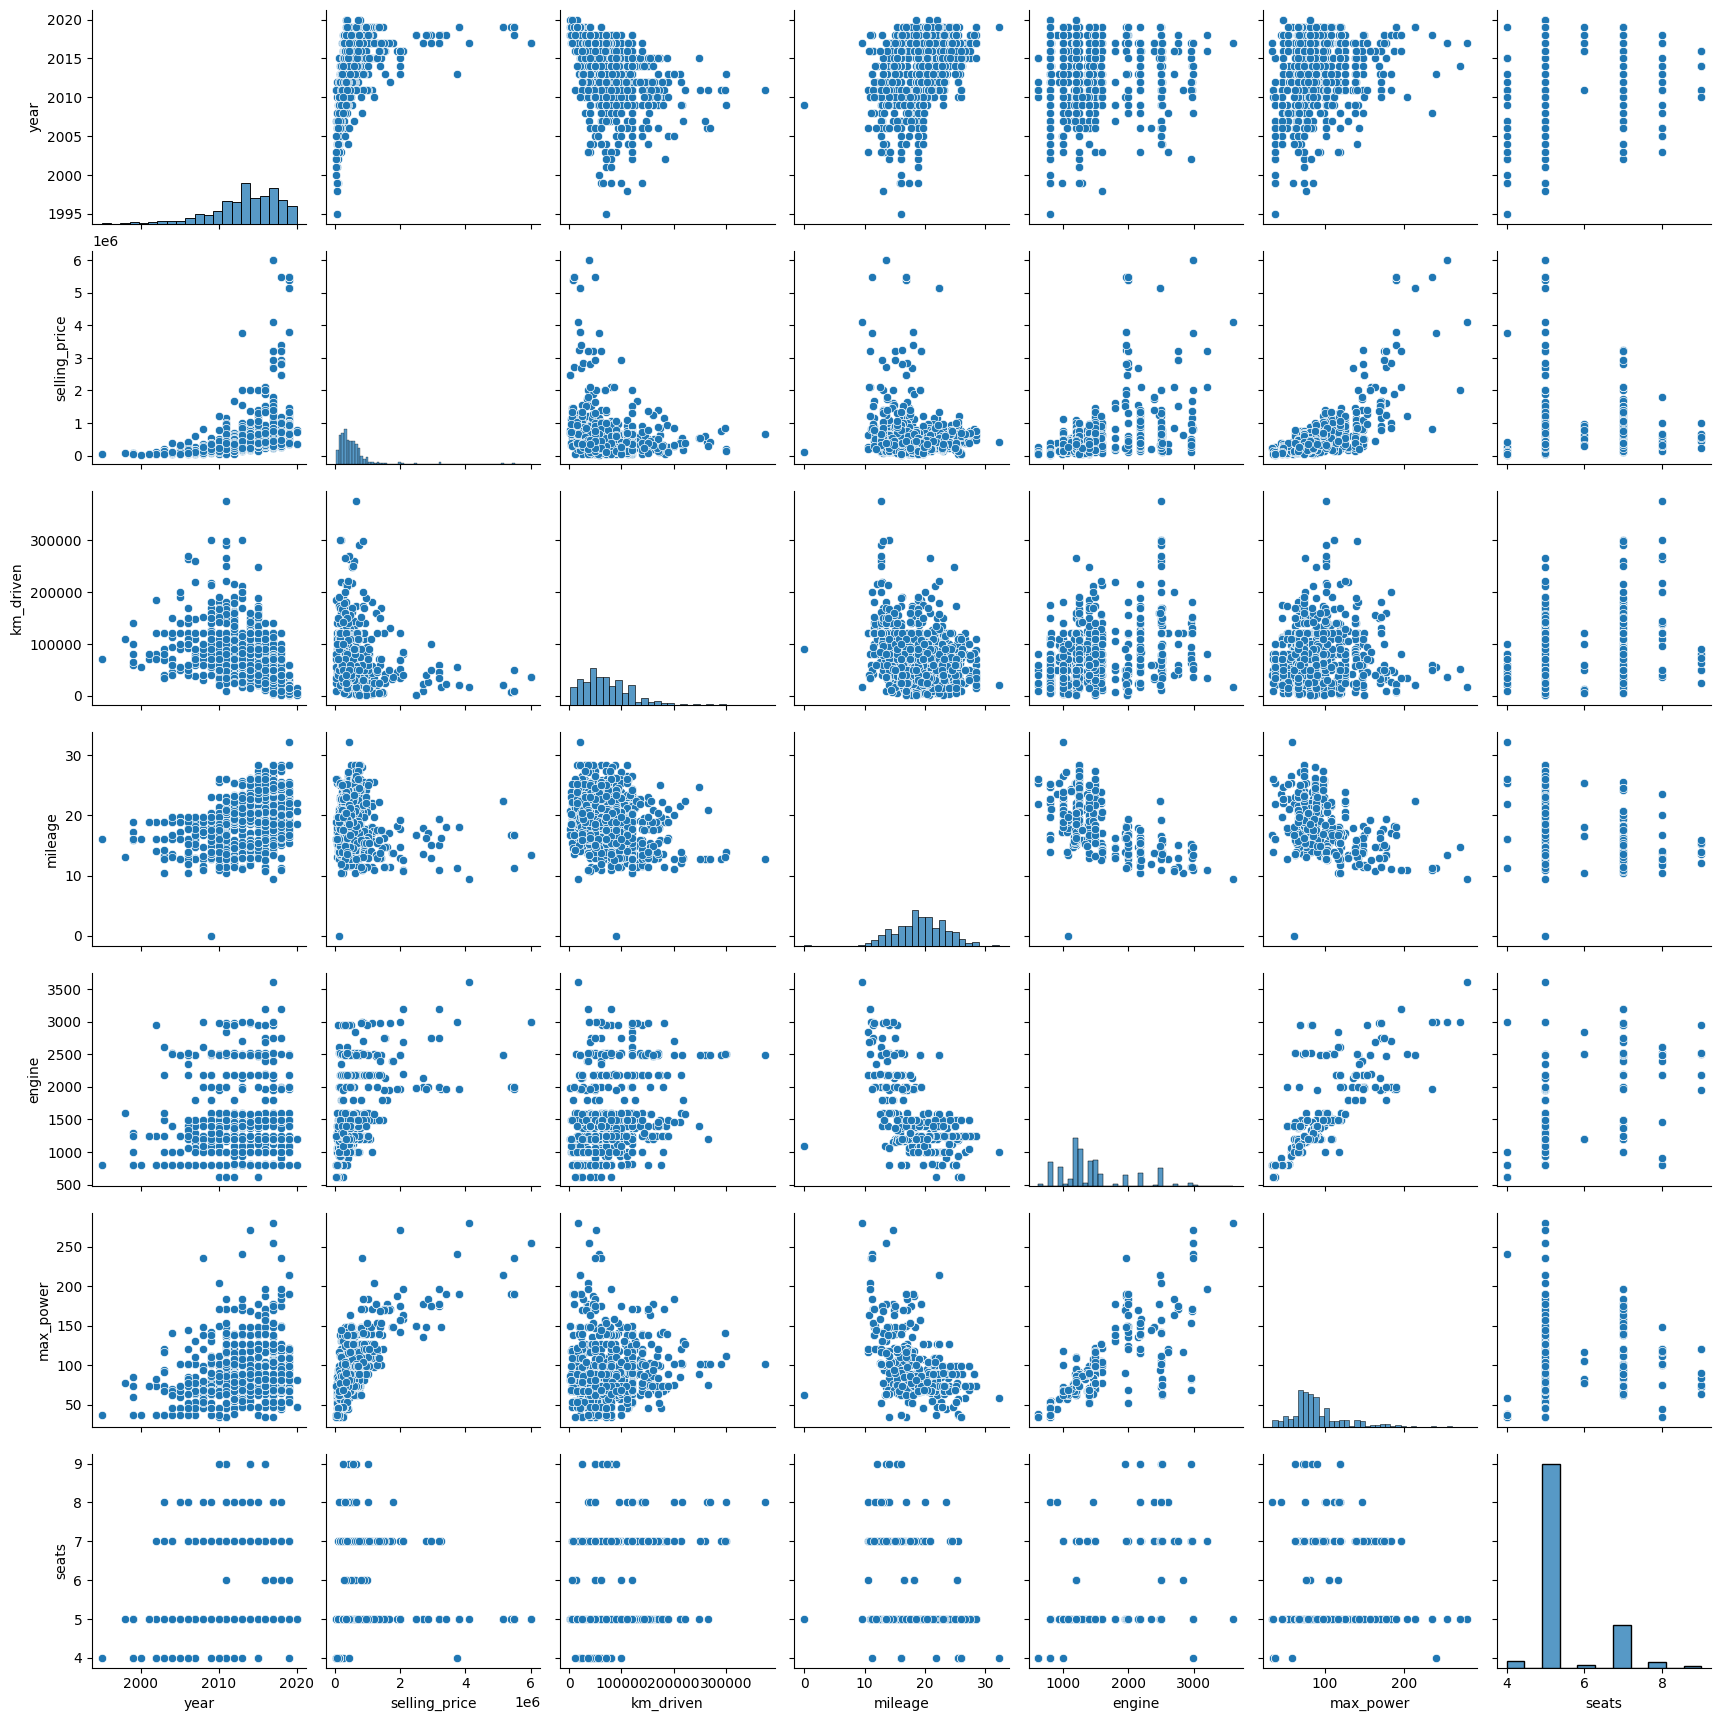

In [42]:
# your code here# your code here
sns.pairplot(df_test)

Распределения в разбивке на трейн и тест оказались похожи, но не везде. На многих распределения в тестовой выьорке оказалось больше распределений, показывающих зависимости

`Your answer here`

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [147]:
# your code here
correlation_matrix = df_train.select_dtypes(include='number').corr('pearson')
correlation_matrix

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.328422  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.109195  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.172779  0.229766   
mileage        0.328422      -0.109195  -0.172779  1.000000 -0.560086   
engine         0.002819       0.447672   0.229766 -0.560086  1.000000   
max_power      0.038042       0.441741   0.088821 -0.468407  0.626724   
seats          0.041178       0.149953   0.192328 -0.435182  0.652172   

               max_power     seats  
year            0.038042  0.041178  
selling_price   0.441741  0.149953  
km_driven       0.088821  0.192328  
mileage        -0.468407 -0.435182  
engine          0.626724  0.652172  
max_power       1.000000  0.338013  
seats           0.338013  1.000000

<Axes: >

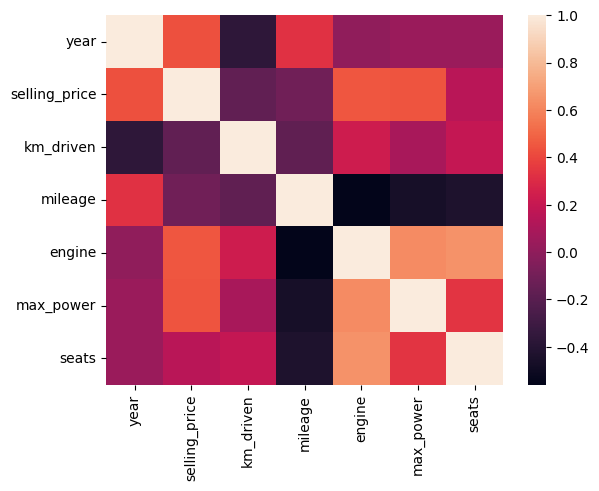

In [148]:
sns.heatmap(correlation_matrix)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`
Исходя из вышевычисленной матрицы корреляции, можно сделать следующие выводы:

* Наименее скоррелированы между собой год выпуска и объем двигателя
* Довольно сильная положительная корреляция наблюдается между объемом двигателя и числом сидений, объемом двигателя и максимальной мощностью
* По вычисленной матрице корреляции между годом и пробегом в километрах наьлюдается отрицательная корреляция, из чего можно сделать вывод, что чем меньше год, тем больше пробег в километрах, но зависимость не ярко выражена (менее 0.5), поэтому связь не сильная

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

Я считаю, что стоит нарисовать боксплот, для визуализации распределений и визуализации выбросов

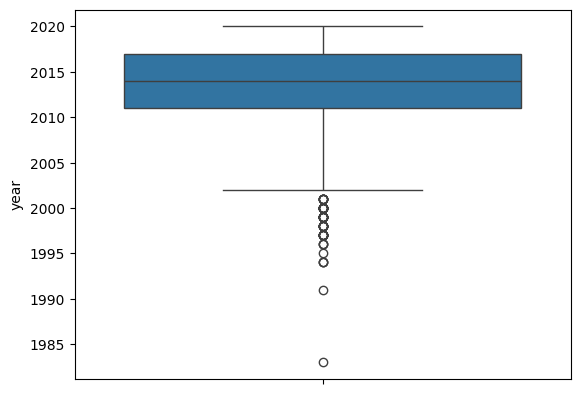

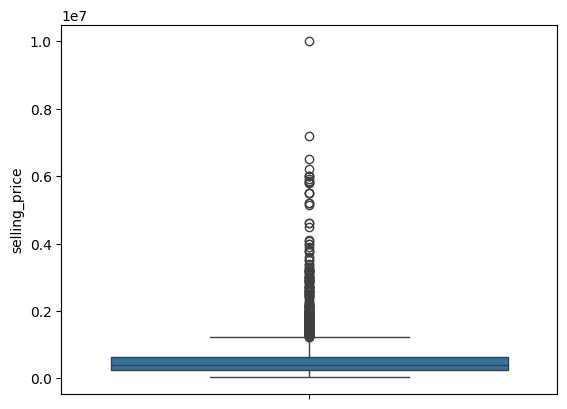

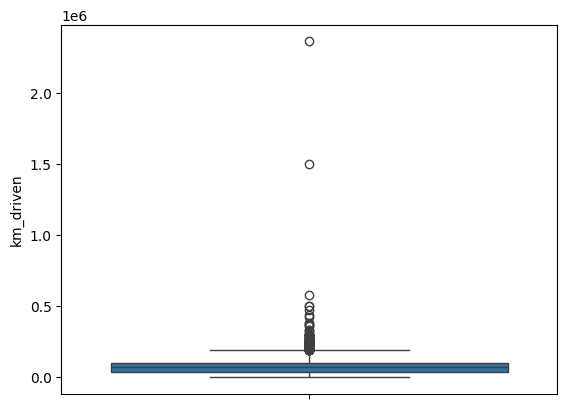

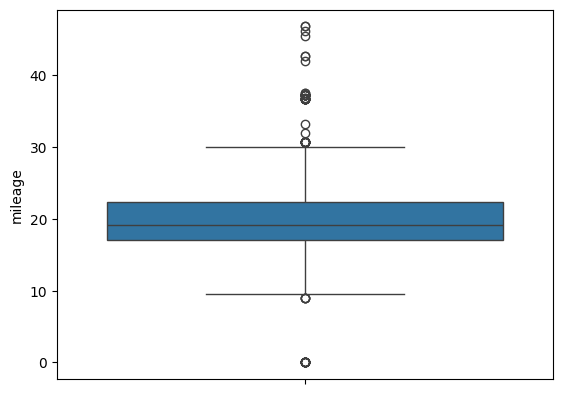

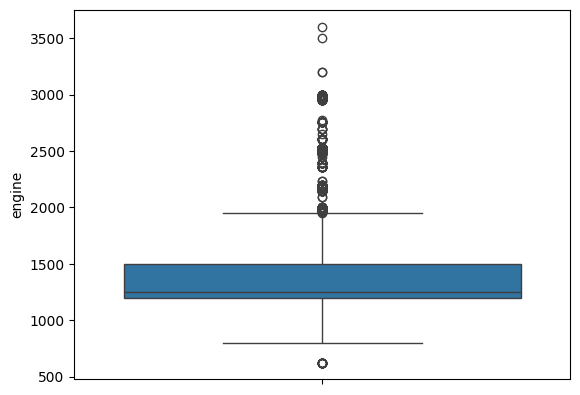

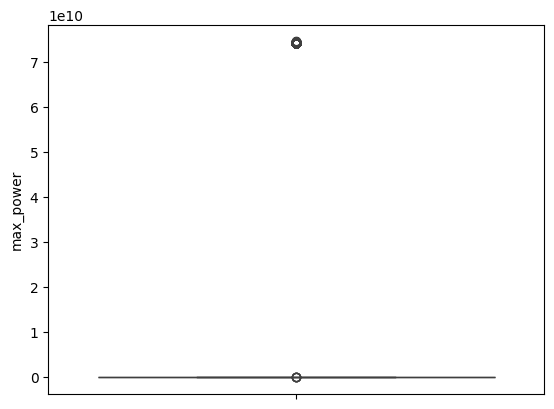

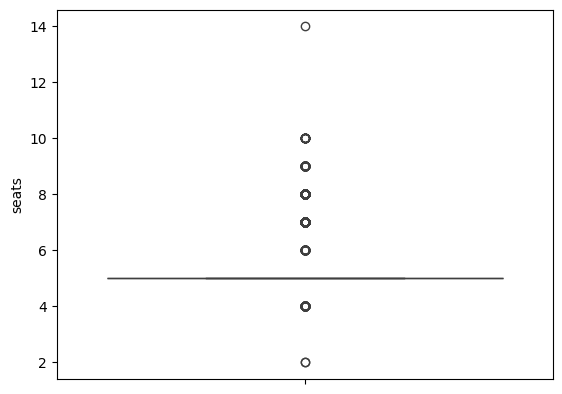

In [149]:
# your code here
for column in df_train.select_dtypes(include='number').columns:
  sns.boxplot(df_train[column])
  plt.show()

In [58]:
df_train[df_train['max_power'] > 7e10]['max_power'].count()

1438

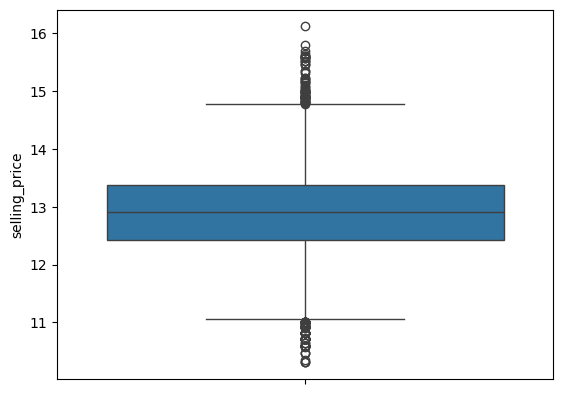

In [315]:
sns.boxplot(np.log(df_train['selling_price']))
plt.show()

Поле max_power имеет довольно сильные выбросы, которые наблюдались при попарных распределениях в том числе. Но их число довольно велико, поэтому просто убрать такие строки будет неверным решением

Наша целевая переменная имеет большое число выбросов. С такой проблемой стоит подобрать лосс менее чувствительный к выбросам и по нему обучать GridSearch, например, MAE

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [240]:
df_train_numeric = df_train.select_dtypes(include= 'number')

In [241]:
y_train = df_train_numeric['selling_price']
X_train = df_train_numeric.drop('selling_price', axis=1)

In [242]:
X_train

year  km_driven  mileage  engine     max_power  seats
0     2014     145500    23.40    1248  7.477447e+07      5
1     2014     120000    21.14    1498  7.417407e+10      5
2     2010     127000    23.00    1396  7.497407e+07      5
3     2007     120000    16.10    1298  7.487487e+07      5
4     2017      45000    20.14    1197  7.487417e+07      5
...    ...        ...      ...     ...           ...    ...
6992  2008     191000    17.92    1086  7.467427e+07      5
6993  2013      50000    18.90     998  7.467477e+07      5
6994  2013     110000    18.50    1197  7.487427e+07      5
6995  2007     119000    16.80    1493  7.417417e+10      5
6996  2009     120000    19.30    1248  7.477437e+07      5

[5840 rows x 6 columns]

In [243]:
assert X_train.shape == (5840, 6)

In [244]:
df_test_numeric = df_test.select_dtypes(include='number')

In [245]:
y_test = df_test_numeric['selling_price']
X_test = df_test_numeric.drop('selling_price', axis=1)

In [246]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [417]:
import matplotlib.pyplot as plt
def plot_true_vs_pred(ax, y_pred, y_true, start = 0, end= 100, title=None):
  ax.plot(np.linspace(start, end, end-start), y_true[start:end], label='True Values')
  ax.plot(np.linspace(start, end, end-start), y_pred[start:end], label='Predictions')
  ax.set_xlabel('Index')
  ax.set_ylabel('Target Value')
  ax.set_title(title)
  ax.legend()

def plot_subplots(pred_test, y_test, pred_train, y_train):
  fig, axs = plt.subplots(1, 2, figsize=(14, 6))
  plot_true_vs_pred(axs[0], pred_test, y_test, 0, 100, title='True vs Predicted (Test Data)')
  axs[0].set_title('True vs Predicted (Test Data)')

  plot_true_vs_pred(axs[1], pred_train, y_train, 0, 100, title = 'True vs Predicted (Train Data)')
  axs[1].set_title('True vs Predicted (Train Data)')
  plt.tight_layout()
  plt.show()

def model_metrics(y_train, pred_train, y_test, pred_test):
  print(f"R2 for train: {r2_score(y_train,pred_train)}")
  print(f"R2 for test: {r2_score(y_test,pred_test)}")
  print(f"MSE for train: {MSE(y_train,pred_train)}")
  print(f"MSE for test: {MSE(y_test,pred_test)}")
  print(f"MAE for train: {MAE(y_train,pred_train)}")
  print(f"MAE for test: {MAE(y_test,pred_test)}")

In [316]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE, mean_absolute_error as MAE

# your code here

R2 for train: 0.46231194818391796
R2 for test: 0.37164599352273275
MSE for train: 154122009727.45096
MSE for test: 361195825972.9573
MAE for train: 200516.5762625446
MAE for test: 252274.54799933077


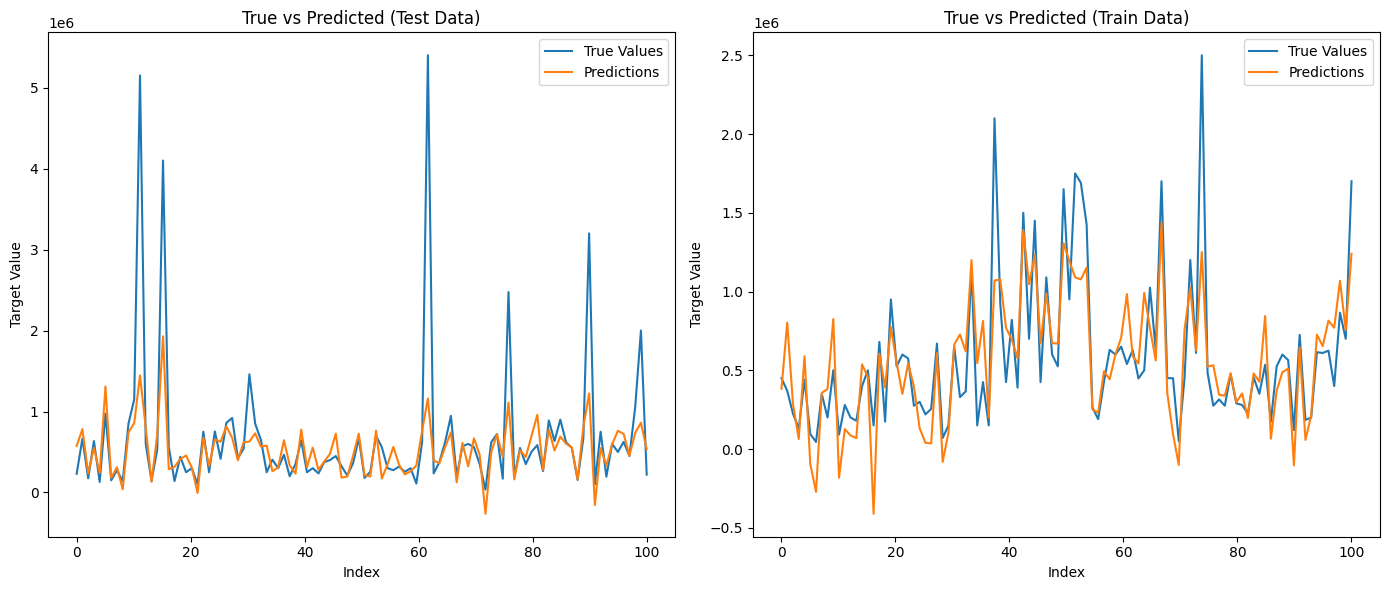

In [418]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train,pred_test = lr.predict(X_train), lr.predict(X_test)
model_metrics(y_train, pred_train, y_test, pred_test)
plot_subplots(pred_test, y_test, pred_train, y_train)

Поскольку целевая переменная имеет большие выбросы, попробую сгладить ее с помощью логарифмирования

In [419]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

R2 for train: 0.7711096191715752
R2 for test: 0.7228803171127698
MSE for train: 0.13376008237704573
MSE for test: 0.19822569316465824
MAE for train: 0.27450404893099095
MAE for test: 0.3368738996681317


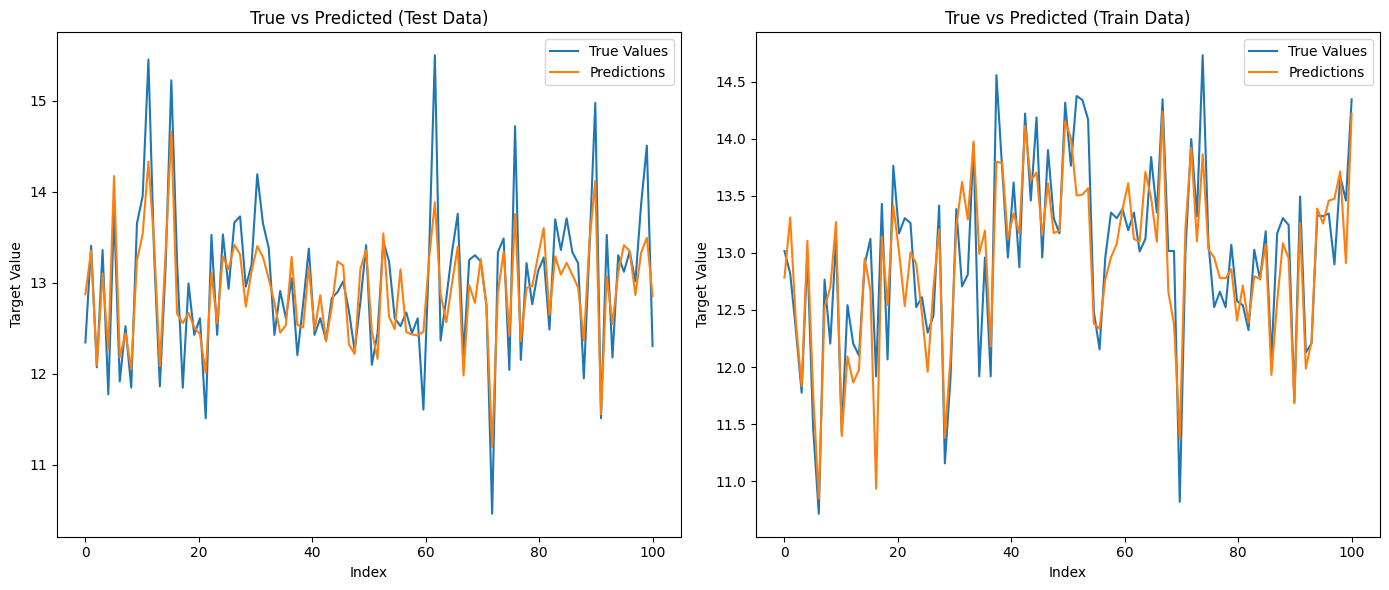

In [420]:
lr_1 = LinearRegression()
lr_1.fit(X_train, y_train_log)
pred_train, pred_test = lr_1.predict(X_train), lr_1.predict(X_test)
model_metrics(y_train_log, pred_train, y_test_log, pred_test)
plot_subplots(pred_test, y_test_log, pred_train, y_train_log)

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [407]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [408]:
scaler.fit(X_train)

StandardScaler()

In [409]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

In [265]:
with open('scaler.pkl', 'wb') as file:
  pickle.dump(scaler, file)

R2 for train: 0.7711096191715754
R2 for test: 0.7228803171107241
MSE for train: 0.1337600823770456
MSE for test: 0.19822569316612157
MAE for train: 0.2745040489312344
MAE for test: 0.3368738996695881


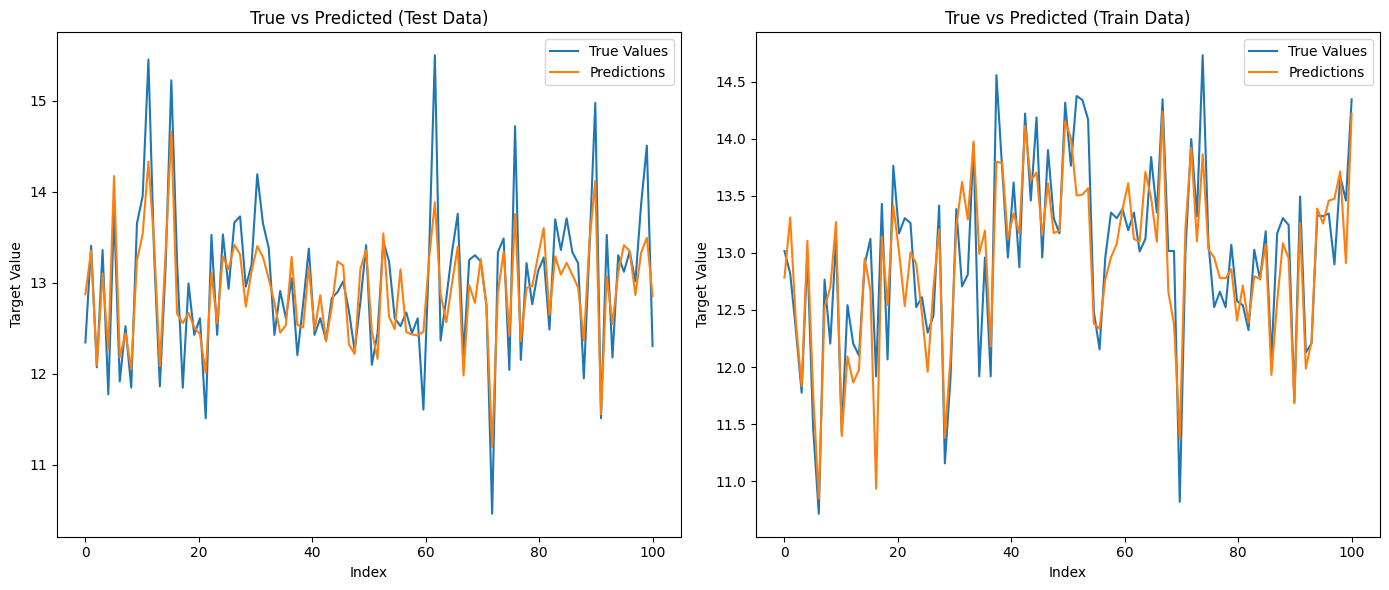

In [481]:
lr_2 = LinearRegression()
lr_2.fit(X_train_scaled, y_train_log)
pred_train, pred_test = lr_2.predict(X_train_scaled), lr_2.predict(X_test_scaled)
model_metrics(y_train_log, pred_train, y_test_log, pred_test)
plot_subplots(pred_test, y_test_log, pred_train, y_train_log)

In [178]:
with open('car_price_predict_lr_2.pkl', 'wb') as file:
  pickle.dump(lr_2, file)

In [482]:
lr_2.coef_

array([ 0.50801194, -0.02741825,  0.07503688,  0.34940121,  0.16202265,
       -0.06539955])

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [483]:
for feature, coef in zip(X_train_scaled.columns, lr_2.coef_):
  print(f"Feature: {feature}, coefficient: {coef}")

Feature: year, coefficient: 0.5080119363657573
Feature: km_driven, coefficient: -0.027418252843062152
Feature: mileage, coefficient: 0.07503688057342822
Feature: engine, coefficient: 0.34940121482233255
Feature: max_power, coefficient: 0.16202265338489427
Feature: seats, coefficient: -0.06539954616294225


In [484]:
# your code here
X_train_scaled.columns[np.argmax(np.abs(lr_2.coef_))]

'year'

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

R2 for train: 0.6408995065463146
R2 for test: 0.5796122117554923
MSE for train: 0.20985290605990245
MSE for test: 0.30070639463251597
MAE for train: 0.3500528061790528
MAE for test: 0.4232061251924364


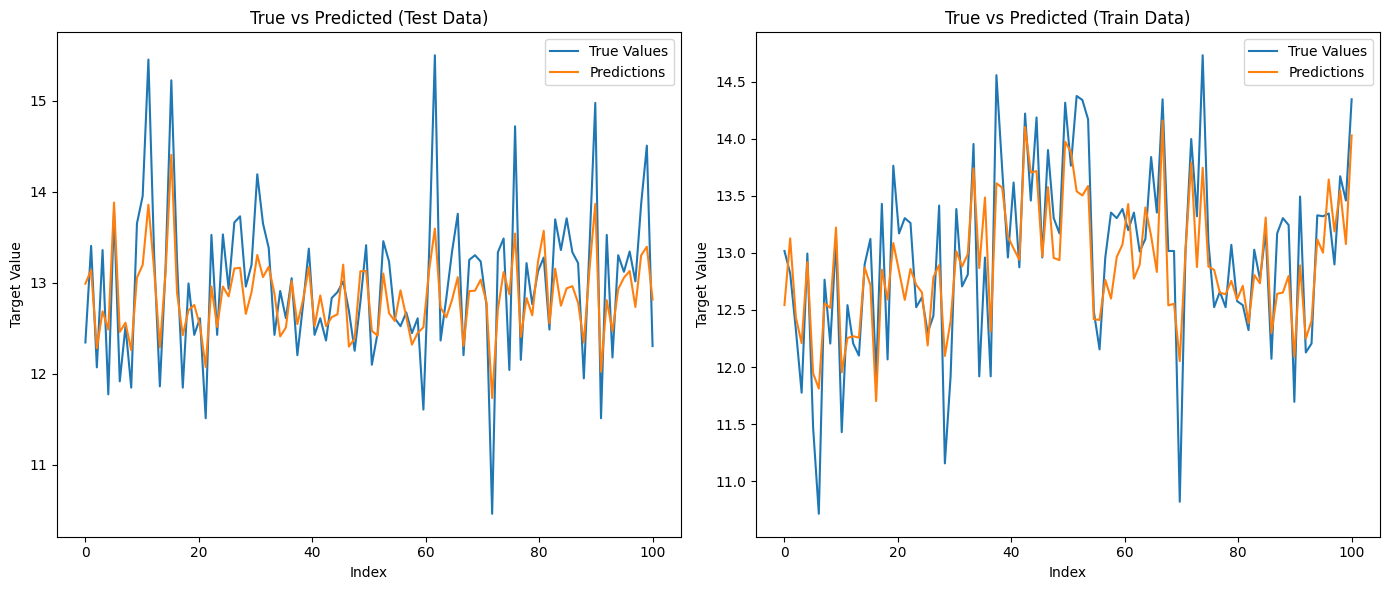

In [425]:
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X_train, y_train_log)
pred_test, pred_train = L1.predict(X_test), L1.predict(X_train)
model_metrics(y_train_log, pred_train, y_test_log, pred_test)
plot_subplots(pred_test, y_test_log, pred_train, y_train_log)

In [426]:
# your code here
L1.coef_

array([ 6.00765604e-02, -2.25585016e-06,  0.00000000e+00,  5.92187500e-04,
        5.10831522e-12, -0.00000000e+00])

In [187]:
with open('car_price_predict_lasso_1.pkl', 'wb') as file:
  pickle.dump(L1, file)

Занулились коэффициенты, отвечающие за расход топлива и число сидений

R2 for train: 0.0
R2 for test: -0.008261345592302849
MSE for train: 0.5843849002868831
MSE for test: 0.7212165589930208
MAE for train: 0.5940428690577187
MAE for test: 0.645672838150774


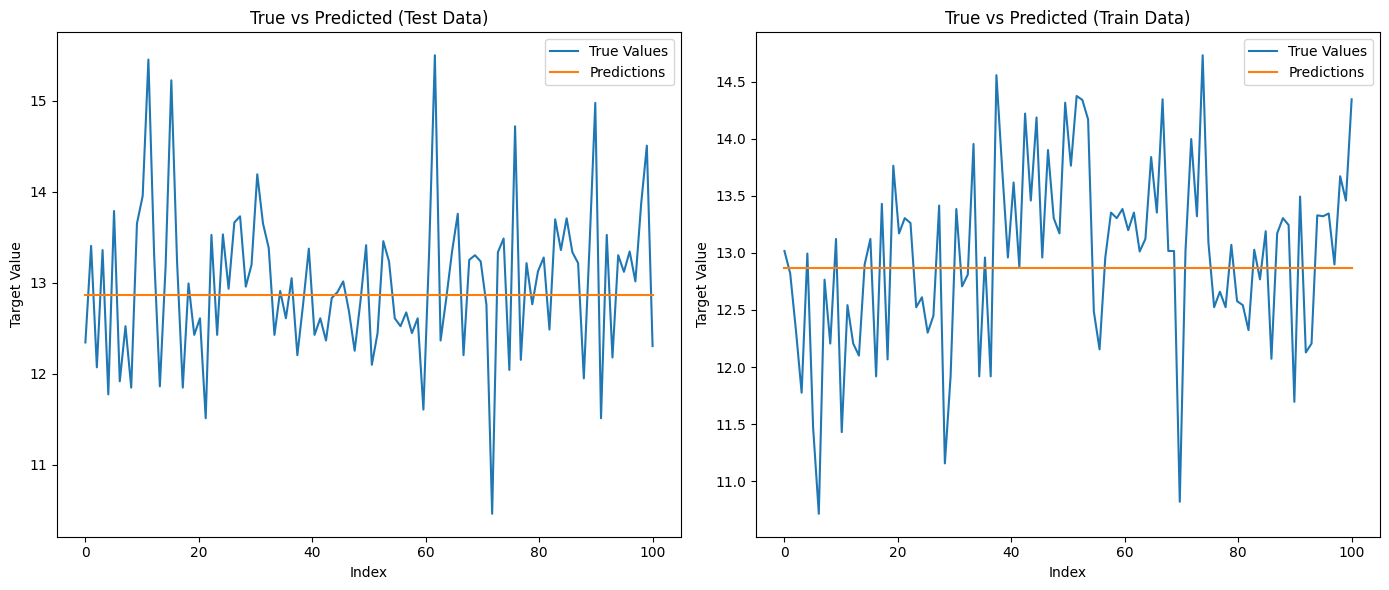

In [480]:
L1_scaled = Lasso()
L1_scaled.fit(X_train_scaled, y_train_log)
pred_test, pred_train = L1_scaled.predict(X_test_scaled), L1_scaled.predict(X_train_scaled)
model_metrics(y_train_log, pred_train, y_test_log, pred_test)
plot_subplots(pred_test, y_test_log, pred_train, y_train_log)

C использованием стандартизации регуляризация перестала работать

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [429]:
from sklearn.model_selection import GridSearchCV
lasso_cv = Lasso()
# your code here
param_grid = {
    'alpha': np.logspace(-4, 100, 100)
}

Best_params: {'alpha': 0.0011233240329780276}
Best model coefficients:  [ 0.50798771 -0.02623391  0.07273718  0.34529973  0.16133496 -0.06259647]
R2 for train: 0.7710881618426579
R2 for test: 0.7221164709971711
MSE for train: 0.1337726217160654
MSE for test: 0.1987720777597839
MAE for train: 0.2746381086682426
MAE for test: 0.33718831955638257


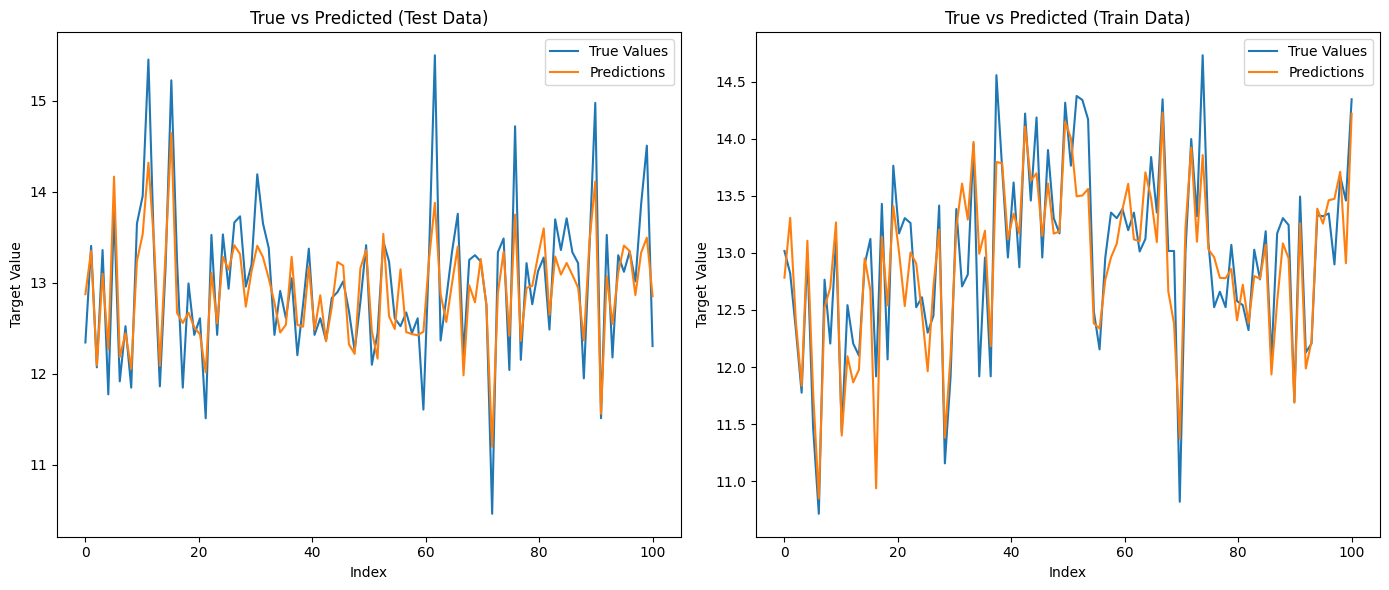

R2 for train: 0.5832479268377375
R2 for test: 0.3445544927392975
MSE for train: 119457121758.43527
MSE for test: 376768794238.37714
MAE for train: 146212.94353957102
MAE for test: 242940.36612912154


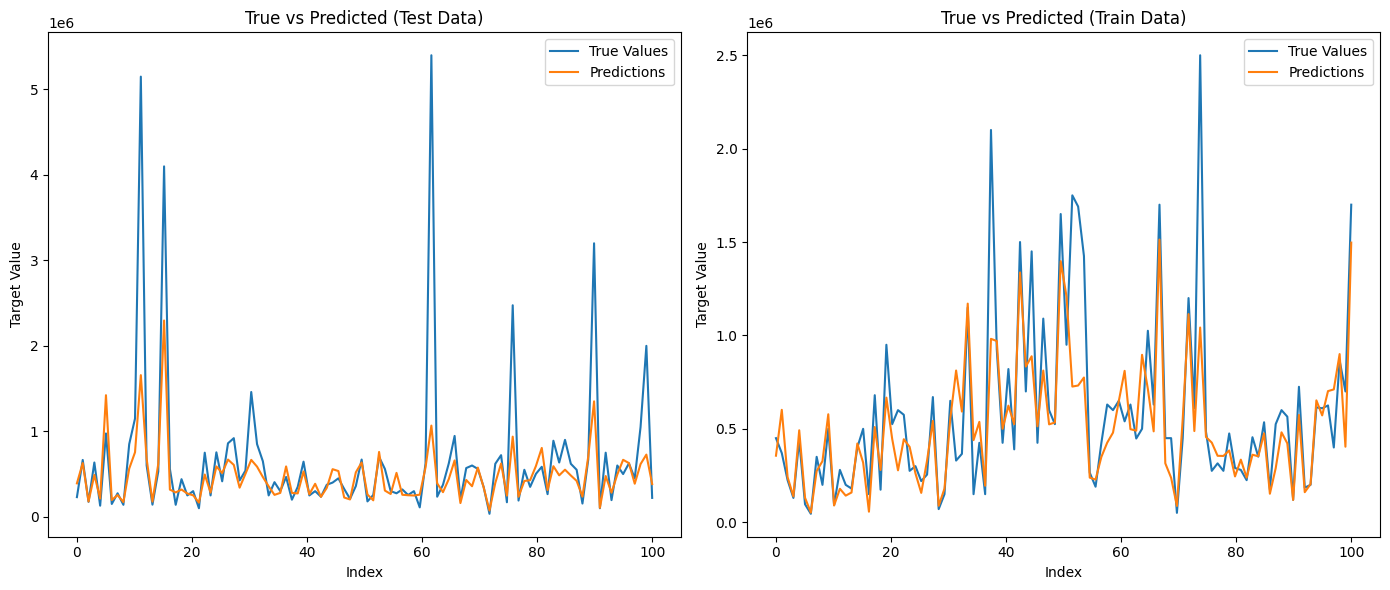

In [449]:
grid_search = GridSearchCV(estimator= lasso_cv,
                           param_grid= param_grid,
                           cv=10,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train_log)
print('Best_params:', grid_search.best_params_)
L1_grid = grid_search.best_estimator_
print('Best model coefficients: ', L1_grid.coef_)
pred_train, pred_test = L1_grid.predict(X_train_scaled), L1_grid.predict(X_test_scaled)
model_metrics(y_train_log, pred_train, y_test_log, pred_test)
plot_subplots(pred_test, y_test_log, pred_train, y_train_log)
model_metrics(y_train, np.exp(pred_train), y_test, np.exp(pred_test))
plot_subplots(np.exp(pred_test), y_test, np.exp(pred_train), y_train)

Best_params: {'alpha': 0.0001}
Best model coefficients:  [ 1.24037669e-01 -4.56863502e-07  1.77435639e-02  7.19232845e-04
  5.07592382e-12 -6.63912550e-02]
R2 for train: 0.7711095851963858
R2 for test: 0.7228397777578408
MSE for train: 0.13376010223163332
MSE for test: 0.19825469125547424
MAE for train: 0.27450901349624424
MAE for test: 0.33689561971667176


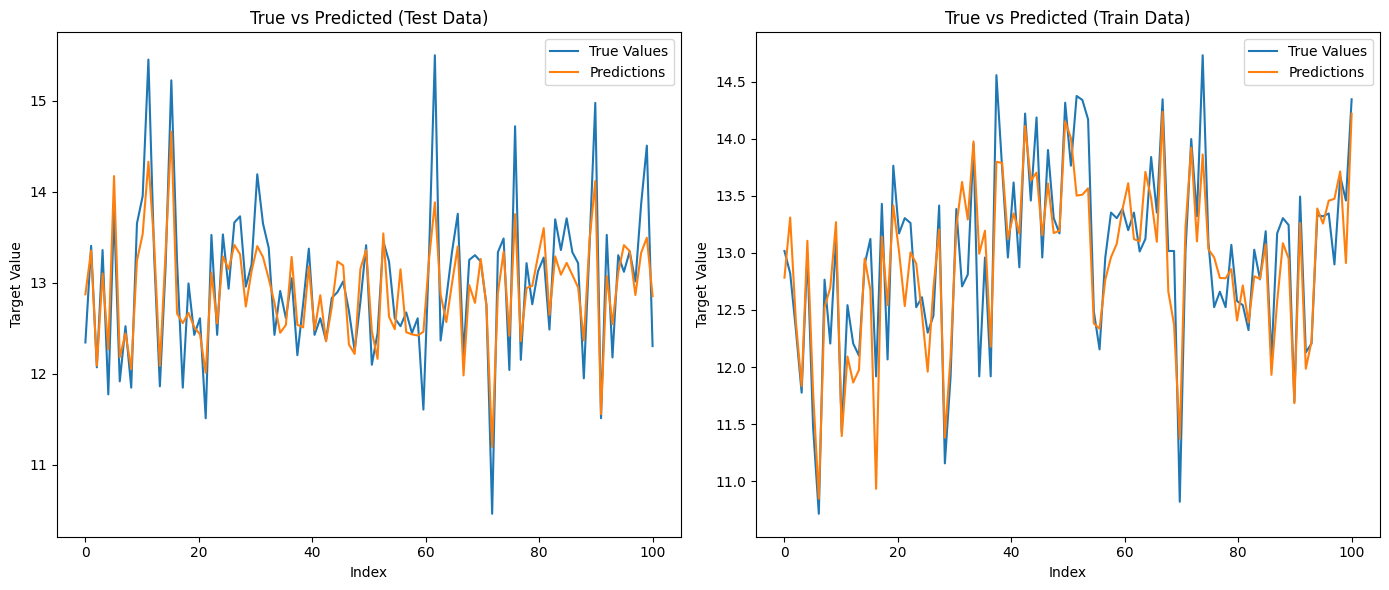

In [455]:
grid_search = GridSearchCV(estimator= lasso_cv,
                           param_grid= param_grid,
                           cv=10,
                           scoring='r2')
grid_search.fit(X_train, y_train_log)
print('Best_params:', grid_search.best_params_)
L1_grid_1 = grid_search.best_estimator_
print('Best model coefficients: ', L1_grid_1.coef_)
pred_train, pred_test = L1_grid_1.predict(X_train), L1_grid_1.predict(X_test)
model_metrics(y_train_log, pred_train, y_test_log, pred_test)
plot_subplots(pred_test, y_test_log, pred_train, y_train_log)

Best_params: {'alpha': 0.0011233240329780276}
Best model coefficients:  [ 0.50798771 -0.02623391  0.07273718  0.34529973  0.16133496 -0.06259647]
R2 for train: 0.7710881618426579
R2 for test: 0.7221164709971711
MSE for train: 0.1337726217160654
MSE for test: 0.1987720777597839
MAE for train: 0.2746381086682426
MAE for test: 0.33718831955638257


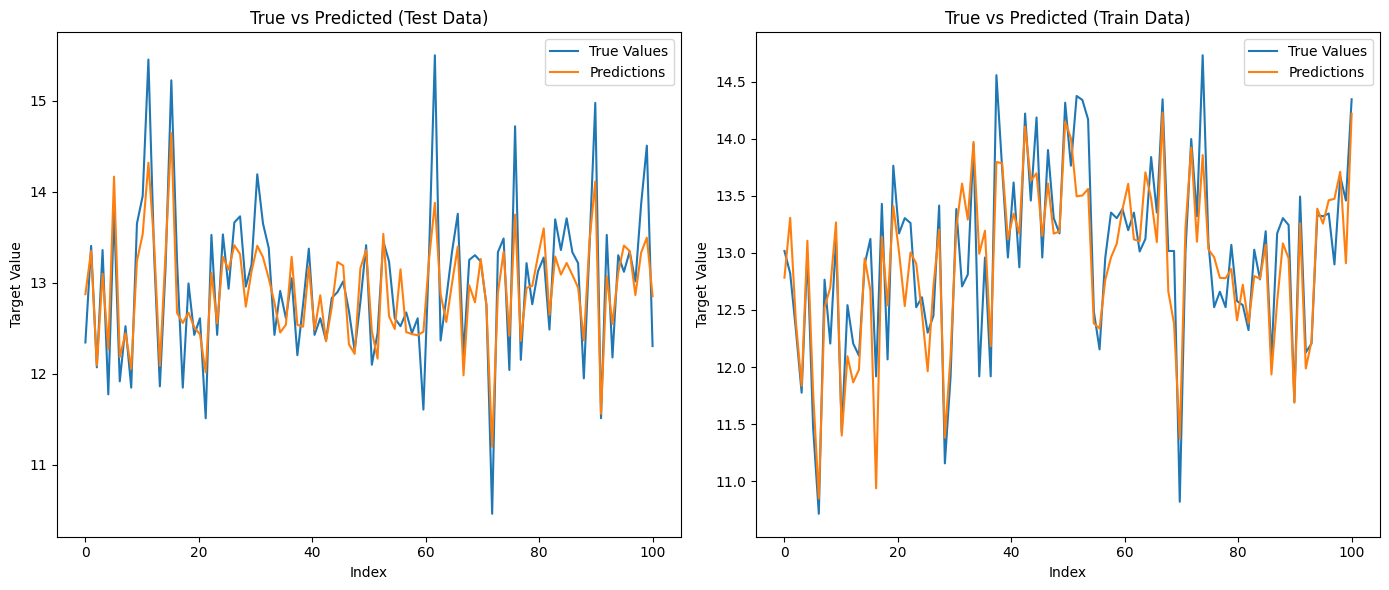

In [456]:
grid_search = GridSearchCV(estimator= lasso_cv,
                           param_grid= param_grid,
                           cv=10,
                           scoring = 'r2')
grid_search.fit(X_train_scaled, y_train_log)
print('Best_params:', grid_search.best_params_)
L1_grid_2 = grid_search.best_estimator_
print('Best model coefficients: ', L1_grid_2.coef_)
pred_train, pred_test = L1_grid_2.predict(X_train_scaled), L1_grid_2.predict(X_test_scaled)
model_metrics(y_train_log, pred_train, y_test_log, pred_test)
plot_subplots(pred_test, y_test_log, pred_train, y_train_log)

Best_params: {'alpha': 0.0001}
Best model coefficients:  [ 0.50801441 -0.0273109   0.07482586  0.34903232  0.16196027 -0.06515046]
R2 for train: 0.7711094463270738
R2 for test: 0.7228145465384899
MSE for train: 0.13376018338476248
MSE for test: 0.19827273932731493
MAE for train: 0.27451499223235193
MAE for test: 0.3369008015104531


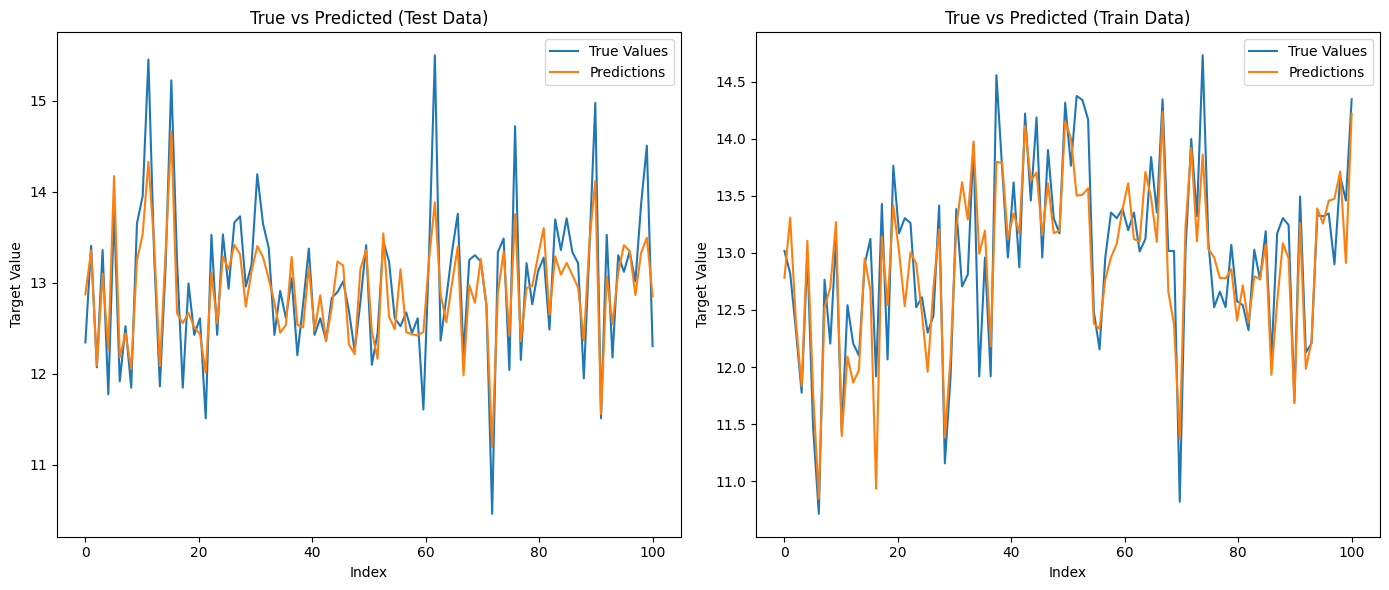

In [457]:
grid_search = GridSearchCV(estimator= lasso_cv,
                           param_grid= param_grid,
                           cv=10,
                           scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X_train_scaled, y_train_log)
print('Best_params:', grid_search.best_params_)
L1_grid_3 = grid_search.best_estimator_
print('Best model coefficients: ', L1_grid_3.coef_)
pred_train, pred_test = L1_grid_3.predict(X_train_scaled), L1_grid_3.predict(X_test_scaled)
model_metrics(y_train_log, pred_train, y_test_log, pred_test)
plot_subplots(pred_test, y_test_log, pred_train, y_train_log)

При переборе было выявлено, что регуляризация с параметром alpha= 0.0001 является наиболее оптимальной по двум метрикам: r2_score, MSE. Ни один из параметров не был занулен


В итоге грид серчу пришлось перебрать 200 моделей, потому что сделал два грид серча по двум лоссам

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

Best_params: {'alpha': 0.003430469286314919, 'l1_ratio': 1.0}
Best model coefficients:  [ 0.5079865  -0.02380075  0.06797948  0.33696666  0.15988092 -0.05690162]
R2 for train: 0.7709109918096377
R2 for test: 0.7205053952857519
MSE for train: 0.1338761572081458
MSE for test: 0.199924491750409
MAE for train: 0.27497651262489986
MAE for test: 0.3378323899020861


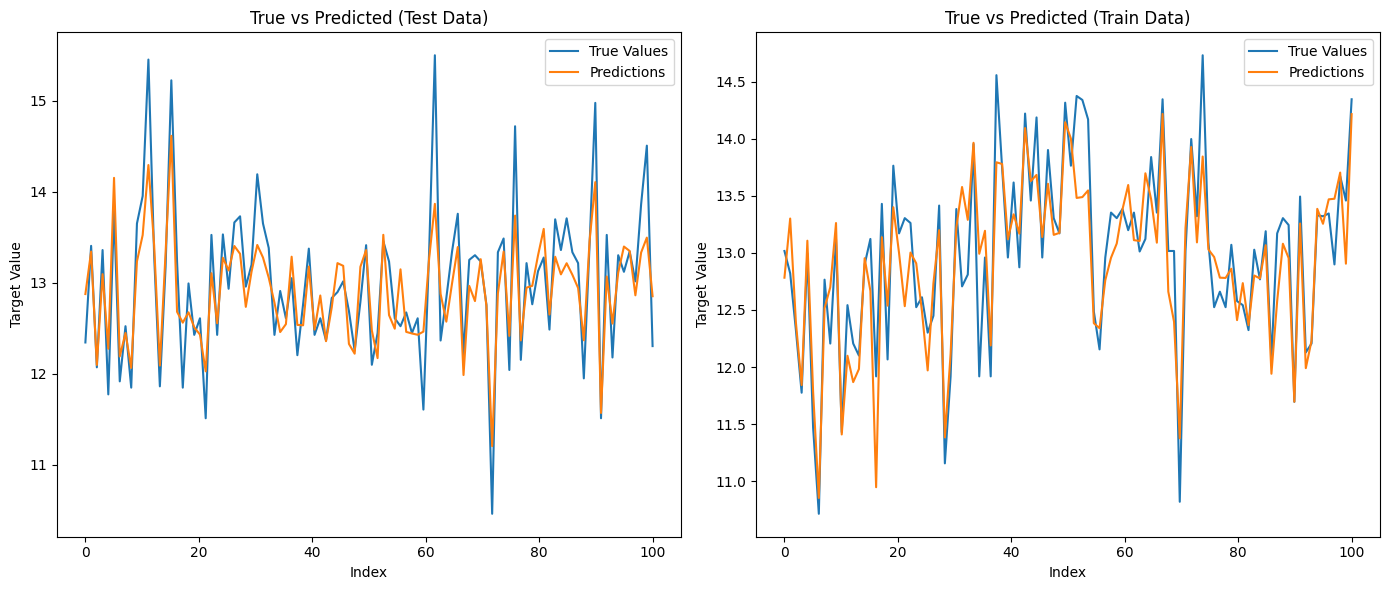

In [458]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
param_grid = {
    'alpha': np.logspace(-4,4,100),
    'l1_ratio': np.linspace(0.01,1,10)
}

grid_search = GridSearchCV(estimator=elastic_net,
                           param_grid=param_grid,
                           cv=10,
                           scoring='r2')
grid_search.fit(X_train_scaled, y_train_log)
print('Best_params:', grid_search.best_params_)
elasticNet = grid_search.best_estimator_
print('Best model coefficients: ', elasticNet.coef_)
pred_train, pred_test = elasticNet.predict(X_train_scaled), elasticNet.predict(X_test_scaled)
model_metrics(y_train_log, pred_train, y_test_log, pred_test)
plot_subplots(pred_test, y_test_log, pred_train, y_train_log)

Я поставил достаточно большой объем для сетки, поэтому пришлось переьрать 1000 моделей...

У лучшей модели следующие гиперпараметры:
* 'alpha': 0.00343,  
* 'l1_ratio': 1


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [195]:
print(f"Число уникальных значений в колонке name: {len(df_train['name'].unique())}")

Число уникальных значений в колонке name: 1924


In [459]:
df_train_cat = df_train.drop('name', axis=1)

In [460]:
df_train_cat['seats'] = df_train_cat['seats'].astype(str)

In [461]:
df_test_cat = df_test.drop('name', axis = 1)

In [462]:
df_test_cat['seats'] = df_test_cat['seats'].astype(str)

In [463]:
# your code here
X_train_cat = df_train_cat.drop('selling_price', axis=1)
y_train_cat = df_train_cat['selling_price']
X_test_cat = df_test_cat.drop('selling_price', axis=1)
y_test_cat = df_test_cat['selling_price']

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [68]:
assert X_train_cat.shape == (5840, 10)

In [464]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner seats
count     5840        5840         5840         5840  5840
unique       4           3            2            5     9
top     Diesel  Individual       Manual  First Owner     5
freq      3177        5223         5336         3603  4618

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [465]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
X_train_cat.describe(include='object')

fuel seller_type transmission        owner seats
count     5840        5840         5840         5840  5840
unique       4           3            2            5     9
top     Diesel  Individual       Manual  First Owner     5
freq      3177        5223         5336         3603  4618

In [466]:
X_train_cat_enc = pd.get_dummies(X_train_cat, drop_first=True)

In [467]:
X_test_cat_enc = pd.get_dummies(X_test_cat, drop_first=True)

In [468]:
cols = X_train_cat_enc.columns
X_test_cat_enc = X_test_cat_enc.reindex(columns = cols).fillna(False)

<ipython-input-468-d1ffb024efe2>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_cat_enc = X_test_cat_enc.reindex(columns = cols).fillna(False)


In [469]:
X_test_cat_enc

year  km_driven  mileage  engine  max_power  fuel_Diesel  fuel_LPG  \
0    2010     168000    14.00    2498     112.00         True     False   
1    2017      25000    21.50    1497     108.50         True     False   
2    2007     218463    12.90    1799     130.00        False     False   
3    2015     173000    25.10    1498      98.60         True     False   
4    2011      70000    16.50    1172      65.00        False     False   
..    ...        ...      ...     ...        ...          ...       ...   
995  2008     100000    19.81    1086      68.05        False     False   
996  2017      50000    18.60    1197      81.83        False     False   
997  2009      40000    23.00    1396      90.00         True     False   
998  2012      25000    20.36    1197      78.90        False     False   
999  2016     110000    26.00    1498      98.60         True     False   

     fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  ...  \
0          False                    True                         False  ...   
1          False                    True                         False  ...   
2           True                    True                         False  ...   
3          False                    True                         False  ...   
4           True                    True                         False  ...   
..           ...                     ...                           ...  ...   
995         True                    True                         False  ...   
996         True                    True                         False  ...   
997        False                    True                         False  ...   
998         True                    True                         False  ...   
999        False                    True                         False  ...   

     owner_Test Drive Car  owner_Third Owner  seats_14  seats_2  seats_4  \
0                   False              False     False    False    False   
1                   False              False     False    False    False   
2                   False              False     False    False    False   
3                   False              False     False    False    False   
4                   False              False     False    False    False   
..                    ...                ...       ...      ...      ...   
995                 False              False     False    False    False   
996                 False              False     False    False    False   
997                 False              False     False    False    False   
998                 False              False     False    False    False   
999                 False              False     False    False    False   

     seats_5  seats_6  seats_7  seats_8  seats_9  
0      False    False     True    False    False  
1       True    False    False    False    False  
2       True    False    False    False    False  
3       True    False    False    False    False  
4       True    False    False    False    False  
..       ...      ...      ...      ...      ...  
995     True    False    False    False    False  
996     True    False    False    False    False  
997     True    False    False    False    False  
998     True    False    False    False    False  
999     True    False    False    False    False  

[1000 rows x 23 columns]

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.26468e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.2466e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.28105e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.24834e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

Best_params: {'alpha': 1.2648552168552958}
Best model coefficients:  [ 1.12481663e-01 -3.99681020e-07  1.36085686e-02  5.46998680e-04
  4.26671418e-12  3.96410983e-01  2.16110143e-01  2.43983972e-01
 -1.30683899e-01 -3.74998146e-02 -3.46708330e-01 -1.13423168e-01
 -9.34810399e-02  7.93543333e-01 -9.67001991e-02  8.42275074e-04
 -8.98684701e-02  6.48899298e-02  2.98597804e-01  6.97372465e-02
  2.59313999e-01  1.90312373e-01 -3.01929303e-02]
R2 for train: 0.8029076070030656
R2 for test: 0.7819567341755814
MSE for train: 0.11517781842881665
MSE for test: 0.15596790909117664
MAE for train: 0.25871853743758466
MAE for test: 0.30822074877335415


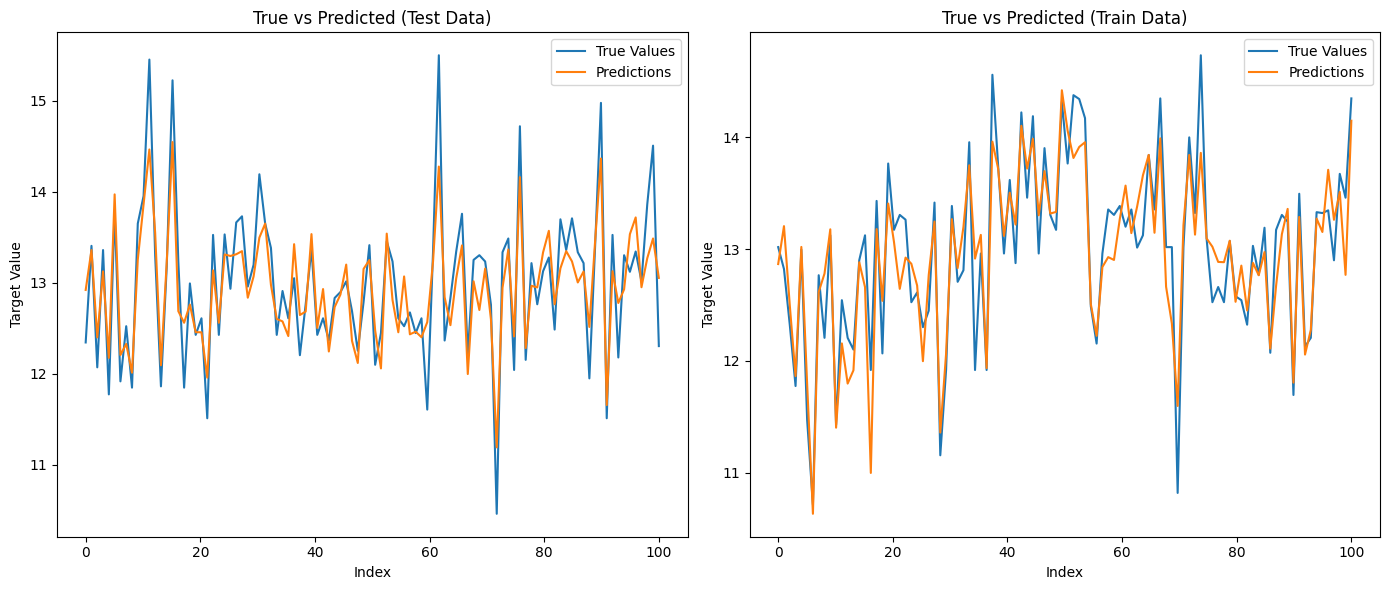

In [472]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
param_grid = {
    'alpha': np.logspace(-5,5,50)
}
grid_search = GridSearchCV(estimator=ridge,
                           param_grid=param_grid,
                           scoring='r2',
                           cv=10)
grid_search.fit(X_train_cat_enc, y_train_log)
print('Best_params:', grid_search.best_params_)
ridge_cat = grid_search.best_estimator_
print('Best model coefficients: ', ridge_cat.coef_)
pred_train, pred_test = ridge_cat.predict(X_train_cat_enc), ridge_cat.predict(X_test_cat_enc)
model_metrics(y_train_log, pred_train, y_test_log, pred_test)
plot_subplots(pred_test, y_test_log, pred_train, y_train_log)

In [372]:
with open('car_price_predict_Ridge.pkl', 'wb') as file:
  pickle.dump(ridge_grid, file)

In [473]:
# применю регуляризацию
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_cat_enc)

StandardScaler()

In [474]:
X_train_enc_scalled = pd.DataFrame(scaler.transform(X_train_cat_enc), columns=X_train_cat_enc.columns)
X_test_enc_scalled = pd.DataFrame(scaler.transform(X_test_cat_enc), columns=X_test_cat_enc.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.37042e-37): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Best_params: {'alpha': 1.6161616161616161}
Best model coefficients:  [ 0.4600378  -0.02400966  0.05806556  0.26619874  0.13557698  0.20636743
  0.01831501  0.12989732 -0.03973439 -0.00242547 -0.09725248 -0.01758599
 -0.04219401  0.02741231 -0.02615855  0.00061069 -0.00184792  0.01404071
  0.14005142  0.01059357  0.10507868  0.04226306  0.00151871]
R2 for train: 0.8030072922174244
R2 for test: 0.7816882691956402
MSE for train: 0.11511956389476354
MSE for test: 0.15615994401336203
MAE for train: 0.25860246814745425
MAE for test: 0.30827670935366963


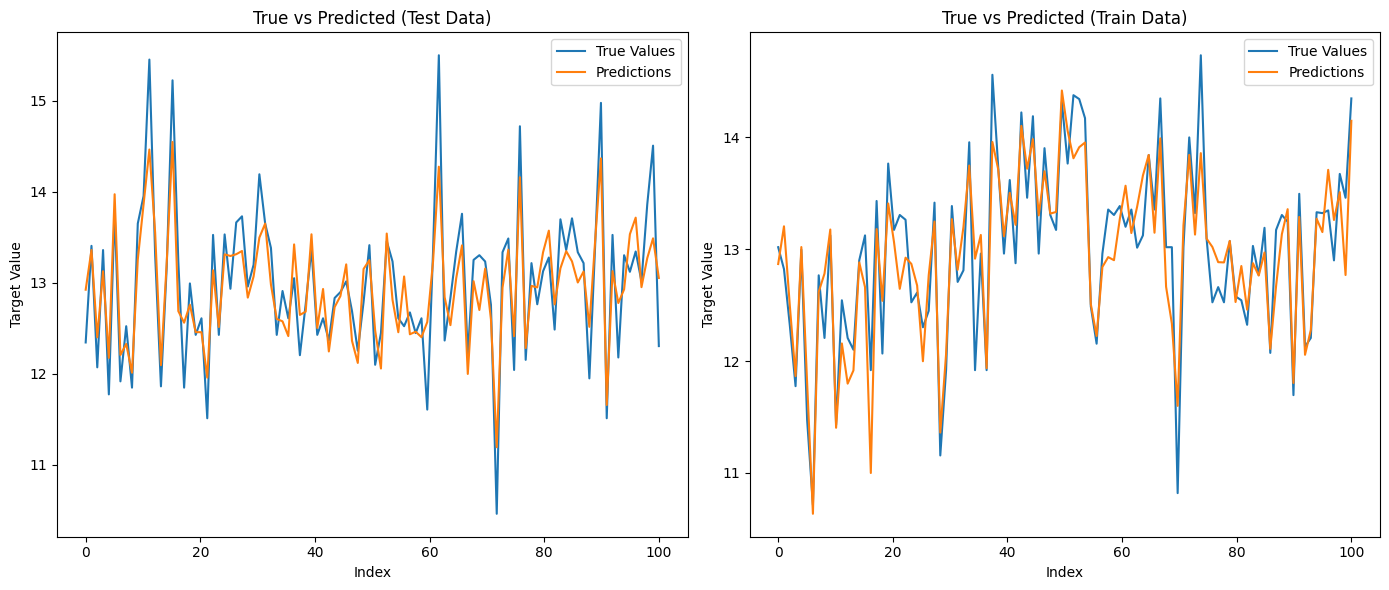

In [477]:
ridge = Ridge()
param_grid = {
    'alpha': np.linspace(0,10,100)
}
grid_search = GridSearchCV(estimator=ridge,
                           param_grid=param_grid,
                           scoring='r2',
                           cv=10)
grid_search.fit(X_train_enc_scalled, y_train_log)
print('Best_params:', grid_search.best_params_)
ridge_cat_scaled = grid_search.best_estimator_
print('Best model coefficients: ', ridge_cat_scaled.coef_)
pred_train, pred_test = ridge_cat_scaled.predict(X_train_enc_scalled), ridge_cat_scaled.predict(X_test_enc_scalled)
model_metrics(y_train_log, pred_train, y_test_log, pred_test)
plot_subplots(pred_test, y_test_log, pred_train, y_train_log)

In [488]:
with open('car_price_predict_Ridge.pkl', 'wb') as file:
  pickle.dump(ridge_cat_scaled, file)
with open('scaler_categorical.pkl', 'wb') as file:
  pickle.dump(scaler, file)

Ридж регрессия дала самый лучший результат в совокупности с добавлением категориальных признаков и стандартизацией, поэтому буду использовать этот подход в дальнейшем создании интерфейса.

Best_params: {'alpha': 1.8181818181818181}
Best model coefficients:  [ 0.50783478 -0.02745742  0.07502436  0.34914415  0.16207718 -0.06522064]
R2 for train: 0.7711095219890578
R2 for test: 0.7227545968333462
MSE for train: 0.13376013916904145
MSE for test: 0.19831562178060483
MAE for train: 0.2745146519457635
MAE for test: 0.33693957926673407


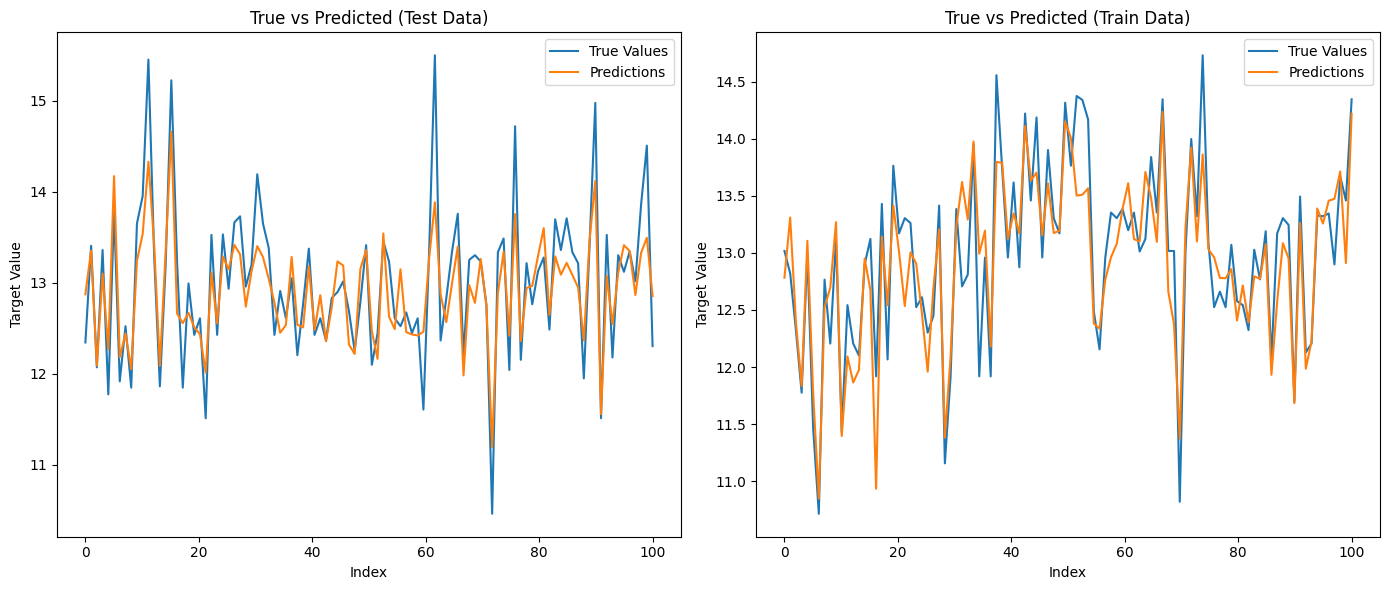

In [478]:
ridge = Ridge()
param_grid = {
    'alpha': np.linspace(0,10,100)
}
grid_search = GridSearchCV(estimator=ridge,
                           param_grid=param_grid,
                           scoring='r2',
                           cv=10)
grid_search.fit(X_train_scaled, y_train_log)
print('Best_params:', grid_search.best_params_)
ridge_scaled = grid_search.best_estimator_
print('Best model coefficients: ', ridge_scaled.coef_)
pred_train, pred_test = ridge_scaled.predict(X_train_scaled), ridge_scaled.predict(X_test_scaled)
model_metrics(y_train_log, pred_train, y_test_log, pred_test)
plot_subplots(pred_test, y_test_log, pred_train, y_train_log)

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [479]:
def business_metric(y_true, y_pred):
  n = len(y_true)
  business = 0
  for right, pred in zip(y_true, y_pred):
    if abs(right - pred)/pred <=0.1:
      business += 1
  return business/n

In [487]:
print(f"Business metric for model: 'lr' : {business_metric(y_test, lr.predict(X_test))}")
print(f"Business metric for model: 'lr_1' : {business_metric(y_test, np.exp(lr_1.predict(X_test)))}")
print(f"Business metric for model: 'lr_2' : {business_metric(y_test, np.exp(lr_2.predict(X_test_scaled)))}")
print(f"Business metric for model: 'L1' : {business_metric(y_test, np.exp(L1.predict(X_test)))}")
print(f"Business metric for model: 'L1_grid' : {business_metric(y_test, np.exp(L1_grid.predict(X_test_scaled)))}")
print(f"Business metric for model: 'L1_grid_1' : {business_metric(y_test,np.exp(L1_grid_1.predict(X_test)))}")
print(f"Business metric for model: 'L1_grid_2' : {business_metric(y_test, np.exp(L1_grid_2.predict(X_test_scaled)))}")
print(f"Business metric for model: 'L1_grid_3' : {business_metric(y_test, np.exp(L1_grid_3.predict(X_test_scaled)))}")
print(f"Business metric for model: 'elasticNet' : {business_metric(y_test, np.exp(elasticNet.predict(X_test_scaled)))}")
print(f"Business metric for model: 'ridge_cat_scaled' : {business_metric(y_test, np.exp(ridge_cat_scaled.predict(X_test_enc_scalled)))}")

Business metric for model: 'lr' : 0.279
Business metric for model: 'lr_1' : 0.18
Business metric for model: 'lr_2' : 0.18
Business metric for model: 'L1' : 0.137
Business metric for model: 'L1_grid' : 0.179
Business metric for model: 'L1_grid_1' : 0.18
Business metric for model: 'L1_grid_2' : 0.179
Business metric for model: 'L1_grid_3' : 0.18
Business metric for model: 'elasticNet' : 0.178
Business metric for model: 'ridge_cat_scaled' : 0.193


Наилучшим образом с точки зрения бизнеса повела себя классическая линейная регрессия

`Your answer here`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5840 entries, 0 to 6996
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 593.1+ KB


In [105]:
df_train['mileage']

0       23.40
1       21.14
2       23.00
3       16.10
4       20.14
        ...  
6992    17.92
6993    18.90
6994    18.50
6995    16.80
6996    19.30
Name: mileage, Length: 5840, dtype: float64

In [94]:
df_test_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           1000 non-null   int64  
 1   selling_price  1000 non-null   int64  
 2   km_driven      1000 non-null   int64  
 3   mileage        1000 non-null   float64
 4   engine         1000 non-null   int64  
 5   max_power      1000 non-null   float64
 6   seats          1000 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 54.8 KB


In [95]:
df_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           1000 non-null   int64  
 1   selling_price  1000 non-null   int64  
 2   km_driven      1000 non-null   int64  
 3   fuel           1000 non-null   object 
 4   seller_type    1000 non-null   object 
 5   transmission   1000 non-null   object 
 6   owner          1000 non-null   object 
 7   mileage        1000 non-null   float64
 8   engine         1000 non-null   int64  
 9   max_power      1000 non-null   float64
 10  seats          1000 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



In [84]:
from pydantic import BaseModel, Field
from typing import List

class CarFeatures(BaseModel):
    make: str = Field(..., example="Toyota")
    model: str = Field(..., example="Camry")
    year: int = Field(..., example=2020)
    mileage: int = Field(..., example=30000)
    # Добавьте другие признаки по мере необходимости

class CarFeaturesCollection(BaseModel):
    cars: List[CarFeatures]

In [86]:
car = CarFeatures(make= 'Volvo', model = 'VXW7', year= 2020, mileage= 400)

In [89]:
from pprint import pprint
pprint(car)

CarFeatures(make='Volvo', model='VXW7', year=2020, mileage=400)
